<a href="https://colab.research.google.com/github/ria1994maitra/Project-Porfolio/blob/main/Code_file_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contents

* Health Insurance Lead Prediction
* Problem Definition
* Data Analysis (EDA)
* Pre-processing Pipeline
* Building Machine Learning Models
* Conclusion

#Health Insurance Lead Prediction

FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

#Problem Statement

the company needs a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

# Exploratory Data Analysis(EDA)

In [ ]:
#Importing required Libraries

import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing train and test datasets
train=pd.read_csv('/content/drive/MyDrive/Job-a-Thon@Analytic_vidhya/train1.csv')
test=pd.read_csv('/content/drive/MyDrive/Job-a-Thon@Analytic_vidhya/test1.csv')

In [ ]:
# Checking Data size and its data type
train.shape,test.shape

((50882, 14), (21805, 13))

In [ ]:
# Checking Value counts of each columns
collist=train.columns.values
for i in range (0,len(collist)):
  print(train[collist[i]].value_counts())

2047     1
21151    1
17053    1
19100    1
29339    1
        ..
23905    1
21856    1
44351    1
42302    1
2049     1
Name: ID, Length: 50882, dtype: int64
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
75    2982
23    1671
24    1652
25    1644
22    1563
26    1

In [ ]:
# Visualizing counts of categorical variables for train data
train_cat=train[['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat']]
collist=train_cat.columns.values
ncol=2
nrows=8

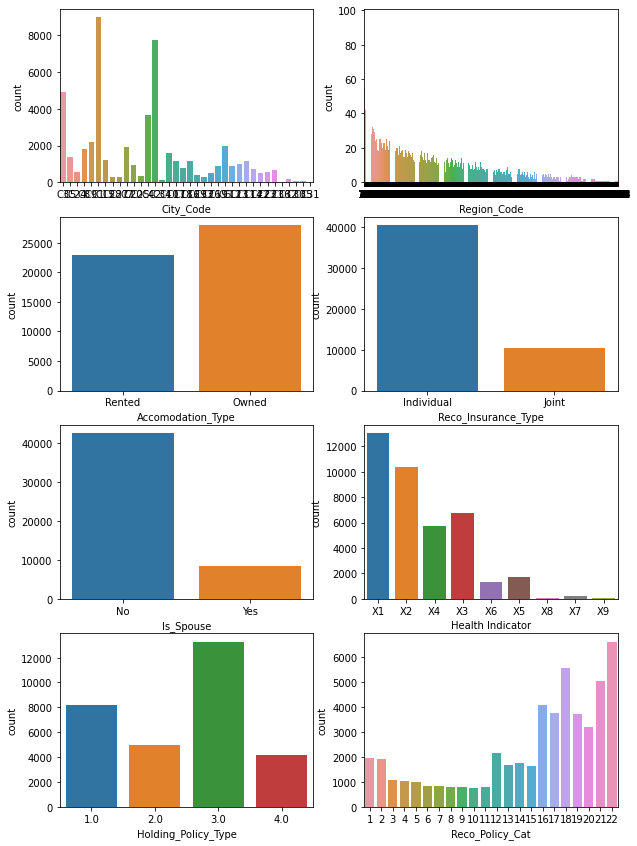

In [ ]:
plt.figure(figsize=(10,30))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=train_cat[collist[i]],data=train_cat)

####**Observations:**
* There are total 36 types city codes
* There are total 5316 types region codes
* Two types of accodomation type,Owned and Rented, Owned type is more 
* Two types of recommended insurance type,Individual and Joint, Individual is more in number
* Two types of is_spouse, No and Yes, No is more in number
* There total 9 types of Health Indicator, X1 type is highest in number where as X9 is lowest in number.
* Holding Policy Duration ranges from 1 years to 14 years and 14+ years. It is interesting to note the highest number of frequency is 1 year but also the second highest is 14+ years.
* There are total 4 types of Holding Policy Type, highest is 3 type is number and 4 is lowest in number
* There are total 22 Reco Policy category, highest is 22nd policy and lowest is 10th policy in number.


In [ ]:
# Removing decimal points and +
def clean_Dura(x):
  x=re.sub('[0-9][0-9][+]','15',str(x))
  x=re.sub('[.][0-9]','',x)

  return x

In [ ]:
# Train Data
train_deci=train[['Holding_Policy_Duration','Reco_Policy_Premium','Holding_Policy_Type']]
collist=train_deci.columns.values
for i in range (0,len(collist)):
  train[collist[i]] = train[collist[i]].apply(lambda x: clean_Dura(x))


In [ ]:
# Test Data
test_deci=test[['Holding_Policy_Duration','Reco_Policy_Premium','Holding_Policy_Type']]
collist=test_deci.columns.values
for i in range (0,len(collist)):
  test[collist[i]] = test[collist[i]].apply(lambda x: clean_Dura(x))


In [ ]:
# Visualizing Skewness of continuous variables for train data
train_num=train[['Upper_Age','Lower_Age','Holding_Policy_Duration','Reco_Policy_Premium']]
collist=train_num.columns.values
ncol=2
nrows=4

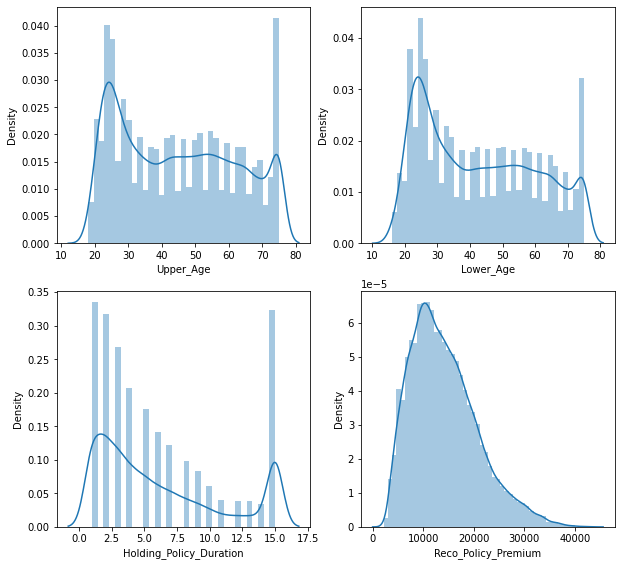

In [ ]:
plt.figure(figsize=(10,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(train_num[collist[i]])

#### **Observations:**
* Upper age ranges between 20 years to 75 years
* Lower age ranges between 18 years to 75 years
* Holding Policy Duration is right skewed
* Reco Policy Premium is right skewed

In [ ]:
# Checking null values
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3,22,11628,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,nan,nan,22,30510,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1,19,7450,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3,19,17780,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1,16,10404,0


#### **Observation:**
* Holding Policy Duration and Holding Policy type also contains null values in the form of nan.

In [ ]:
# Train Data
# Treating Null Values
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].replace('nan','0')
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].replace('0',train['Holding_Policy_Duration'].median())

train['Holding_Policy_Type']=train['Holding_Policy_Type'].replace('nan','0')
train['Holding_Policy_Type']=train['Holding_Policy_Type'].replace('0',train['Holding_Policy_Type'].median())

train['Health Indicator'].fillna(train['Health Indicator'].mode().values[0],inplace=True)

#Removing Decimal point
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].apply(lambda x: clean_Dura(x))
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].apply(lambda x: clean_Dura(x))



In [ ]:
# Test Data
# Treating Null Values
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].replace('nan','0')
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].replace('0',test['Holding_Policy_Duration'].median())

test['Holding_Policy_Type']=test['Holding_Policy_Type'].replace('nan','0')
test['Holding_Policy_Type']=test['Holding_Policy_Type'].replace('0',test['Holding_Policy_Type'].median())

test['Health Indicator'].fillna(test['Health Indicator'].mode().values[0],inplace=True)

#Removing Decimal point
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].apply(lambda x: clean_Dura(x))
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].apply(lambda x: clean_Dura(x))

In [ ]:
# Checking Data Types
train.dtypes

ID                          int64
City_Code                  object
Region_Code                 int64
Accomodation_Type          object
Reco_Insurance_Type        object
Upper_Age                   int64
Lower_Age                   int64
Is_Spouse                  object
Health Indicator           object
Holding_Policy_Duration    object
Holding_Policy_Type        object
Reco_Policy_Cat             int64
Reco_Policy_Premium        object
Response                    int64
dtype: object

In [ ]:
test.dtypes

ID                          int64
City_Code                  object
Region_Code                 int64
Accomodation_Type          object
Reco_Insurance_Type        object
Upper_Age                   int64
Lower_Age                   int64
Is_Spouse                  object
Health Indicator           object
Holding_Policy_Duration    object
Holding_Policy_Type        object
Reco_Policy_Cat             int64
Reco_Policy_Premium        object
dtype: object

In [ ]:
# Correcting Data Types
# train
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].astype('int')
train['Holding_Policy_Type']=train['Holding_Policy_Type'].astype('int')
train['Reco_Policy_Premium']=train['Reco_Policy_Premium'].astype('int')

In [ ]:
#Test
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].astype('int')
test['Holding_Policy_Type']=test['Holding_Policy_Type'].astype('int')
test['Reco_Policy_Premium']=test['Reco_Policy_Premium'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Train
le=LabelEncoder()

list1=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','City_Code']
for val in list1:
  train[val]=le.fit_transform(train[val].astype(str))

In [ ]:
# Test
list1=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','City_Code']
for val in list1:
  test[val]=le.fit_transform(test[val].astype(str))

In [ ]:
# Lets check the correlation.
traincor= train.corr()

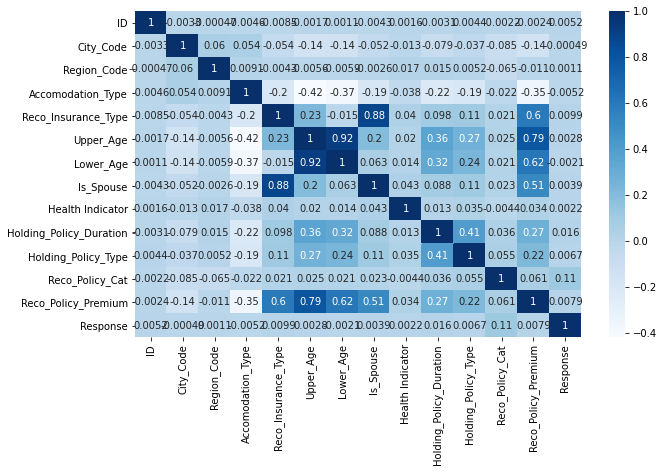

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(traincor,cmap = 'Blues',annot = True)

#### **Observations:**
* High correlation between Reco Insurance Type and Is_Spouse
* High correlation between Upper age and Reco Insurance Premium
* High correlation between Upper age and lower age

In [ ]:
# Checking Outliers
collist=train.columns.values
ncol=2
nrows=10

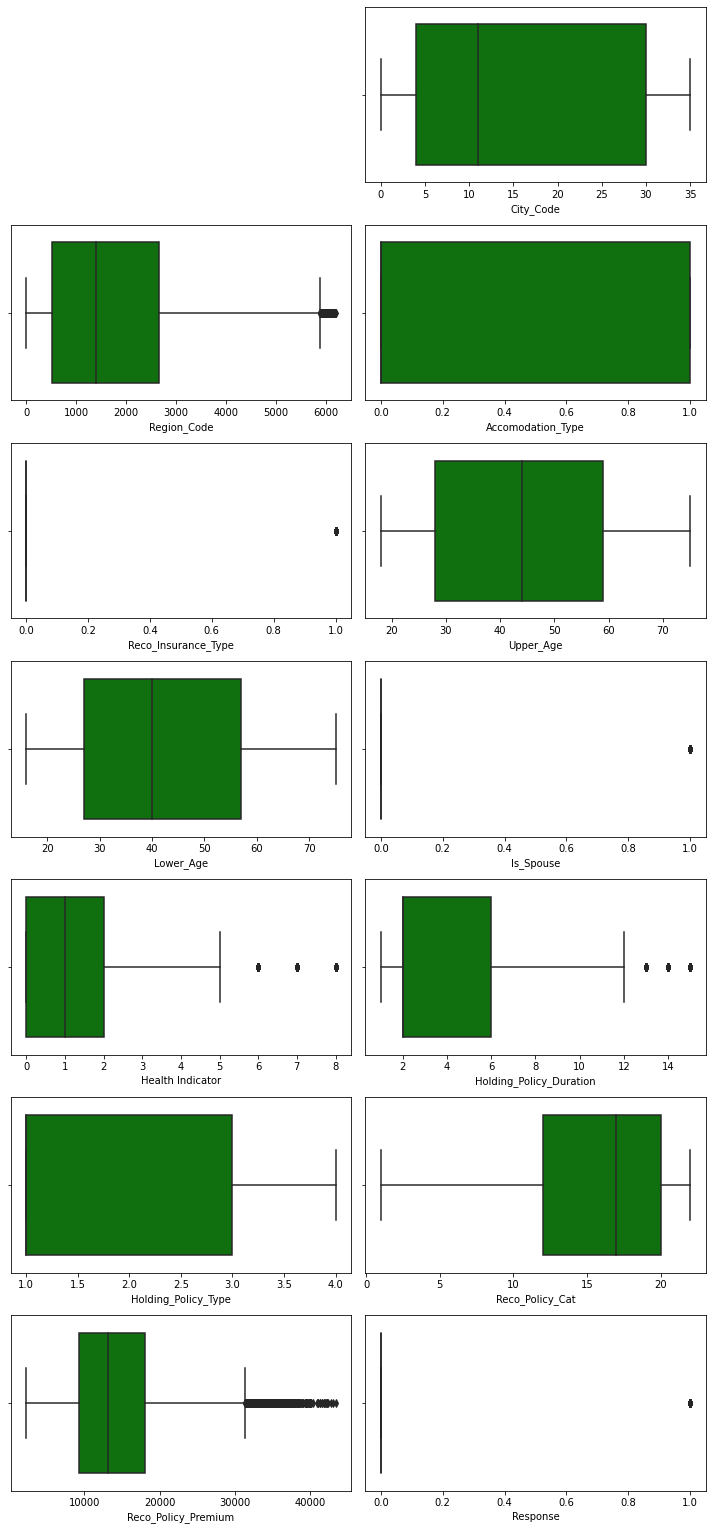

In [ ]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,30))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
#Treating Outliers
# Train Data
train.Region_Code[train.Region_Code>5800]=5800
train.Reco_Insurance_Type[train.Reco_Insurance_Type>0]=0
train.Is_Spouse[train.Is_Spouse>0]=0
train['Health Indicator'][train['Health Indicator']>5]=5
train.Holding_Policy_Duration[train.Holding_Policy_Duration>12]=12
train.Reco_Policy_Premium[train.Reco_Policy_Premium>30010]=30010


In [ ]:
#Treating Outliers
# Test Data
test.Region_Code[test.Region_Code>5800]=5800
test.Reco_Insurance_Type[test.Reco_Insurance_Type>0]=0
test.Is_Spouse[test.Is_Spouse>0]=0
test['Health Indicator'][test['Health Indicator']>5]=5
test.Holding_Policy_Duration[test.Holding_Policy_Duration>12]=12
test.Reco_Policy_Premium[test.Reco_Policy_Premium>30010]=30010

In [ ]:
train.drop(['Is_Spouse'],axis=1,inplace=True)
test.drop(['Is_Spouse'],axis=1,inplace=True)

### **Spliting x and y**

In [ ]:
train_x=train.iloc[:,1:-1]
train_y=train[['Response']]
train_x.shape,train_y.shape

((50882, 11), (50882, 1))

In [ ]:
test_x=test.iloc[:,1:]

test_x.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [ ]:
test_x.shape

(21805, 11)

# Pre-Processing

In [ ]:
# Scaling data before fitting it to models

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

train_x = scale.fit_transform(train_x)
test_x = scale.fit_transform(test_x)

# Models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
gb.score(train_x,train_y)

0.7604064305648363

In [ ]:
pred_gb=gb.predict_proba(test_x)[:,1]

In [ ]:
pred_gb=pd.DataFrame(pred_gb,columns=['Response'])

In [ ]:
id=pd.DataFrame(test['ID'],columns=['ID'])

In [ ]:
pred_gb_sub=pd.concat([id,pred_gb],axis=1)
pred_gb_sub

In [ ]:
pred_gb_sub.to_csv('pred_gb_sub.csv',index=False)

In [ ]:
from sklearn.metrics import f1_score
lg = LogisticRegression()
lg.fit(train_x,train_y)
lg.score(train_x,train_y)

0.6032244718537481

In [ ]:
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lg,X=train_x,y=train_y,cv=5,scoring='accuracy')
print(lgscores)
print(lgscores.mean()*100,lgscores.std()*100)

[0.51919845 0.5680393  0.63358976 0.64483806 0.63087465]
59.93080457890153 4.824925043270933


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb.score(train_x,train_y)

0.7600526708855784

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=10,weights='uniform',algorithm='auto',n_jobs=-1, leaf_size=5)
Knn.fit(train_x,train_y)
Knn.score(train_x,train_y)

0.7660862387484769

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(train_x, train_y)
xg.score(train_x,train_y)

0.7600919775166071

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
xgscores=cross_val_score(xg,X=train_x,y=train_y,cv=5,scoring='accuracy')
print(xgscores)
print(xgscores.mean()*100,xgscores.std()*100)

[0.76014543 0.76004717 0.76012186 0.76002358 0.7603184 ]
76.01312855229729 0.010389894247409706


In [ ]:
pred_xg=xg.predict_proba(test_x)[:,1]

In [ ]:
pred_xg=pd.DataFrame(pred_xg,columns=['Response'])
pred_xg

,Response
0,0.256989
1,0.256791
2,0.266073
3,0.207049
4,0.191070
...,...
21800,0.238987
21801,0.240728
21802,0.007689
21803,0.256701


In [ ]:
pred_xg_sub=pd.concat([id,pred_xg],axis=1)
pred_xg_sub

,ID,Response
0,50883,0.256989
1,50884,0.256791
2,50885,0.266073
3,50886,0.207049
4,50887,0.191070
...,...,...
21800,72683,0.238987
21801,72684,0.240728
21802,72685,0.007689
21803,72686,0.256701


In [ ]:
pred_xg_sub.to_csv('pred_xg_sub.csv',index=False)

# Conclusion
The best score giving model would be efficient for the company.